<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [10]:
# Install requirements for local notebook, if not satisfied
# import sys
# !{sys.executable} -m pip install matplotlib numpy networkx

    100% |████████████████████████████████| 13.1MB 112kB/s eta 0:00:01
    100% |████████████████████████████████| 20.4MB 71kB/s  eta 0:00:01
    100% |████████████████████████████████| 71kB 10.1MB/s ta 0:00:01
    100% |████████████████████████████████| 235kB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 4.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 583kB 1.8MB/s eta 0:00:01


In [24]:
import networkx as nx

def dfs(G, origen, destino):
    discovered= set()
    S=list()
    S.append(origen)
    
    path = []
    expanded=0
    
    while len(S)!=0:
        actual_node=S.pop()
        
        expanded+=1
        
        if actual_node==destino:
            while(G.node[actual_node]['parent']!=origen):
                path.insert(0,actual_node)
                actual_node=G.node[actual_node]['parent']
            
            path.insert(0,actual_node)
            path.insert(0,origen)
            
            break
        
        if actual_node not in discovered:
            discovered.add(actual_node)
            for neighbor_node in list(G.adj[actual_node]):
                S.append(neighbor_node)
                if [x for x in G.node[neighbor_node] if x=='parent']!=['parent']:
                    G.node[neighbor_node]['parent']=actual_node
                
    return {
        'path': path ,
        'expanded' : expanded
    }

In [25]:
G = nx.generators.barabasi_albert_graph(100, 2)
dfs(G, 1, 95)

{'expanded': 37, 'path': [1, 9, 55, 0, 31, 95]}

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [55]:
def cnx(G):
    componentes=[]
    Se=set(G.nodes)
    
    while len(Se)>0:
        node=Se.pop()
        componentes.append(dfs_2(G, node))
        rS=set(componentes[len(componentes)-1])
        for x in rS:
            Se.discard(x)
    
    return componentes
        

def dfs_2(G, origen):
    discovered= set()
    S=list()
    S.append(origen)
    
    while len(S)!=0:
        actual_node=S.pop()
        
        if actual_node not in discovered:
            discovered.add(actual_node)
            for neighbor_node in list(G.adj[actual_node]):
                S.append(neighbor_node)
    
    return list(discovered)

/home/m315/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [32, 33, 34, 35, 36],
 [37, 38]]

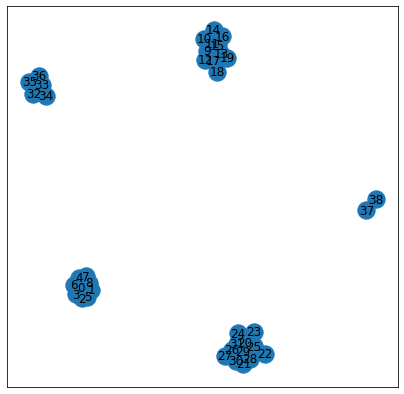

In [58]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
draw(G)
cnx(G)